In [1]:
"""This script has following capabilities:
Source: Coherent phonons in Si/SiGe superlattices
Simulating the phonon dispersion curve using the above paper.
"""

'This script has following capabilities:\nSource: Coherent phonons in Si/SiGe superlattices\nSimulating the phonon dispersion curve using the above paper.\n'

In [2]:
# Load the modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import re


Acoustic impedences:
ZA= 24697410 Kg/m^2s
ZB= 19626483 Kg/m^2s

Ratio of impedence:
delta =  1.2583716603733843

Acoustic modulation:
Chi =  0.2303246456105525

Gamma =  0.026524721187813318

Effective sound velocity: 6487.51137967537 m/s


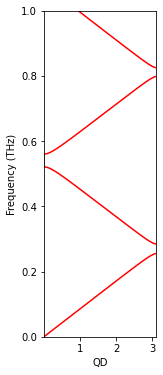

Intersections at center at  0.01
POINT (0.01 0.5213227617899803)
POINT (0.01 0.5598603478305724)
POINT (0.01 0.0008561118875812)

Intersections at zone boundary at  3.09
POINT (3.09 0.8253486177042108)
POINT (3.09 0.7976820807813086)
POINT (3.09 0.2847505493416961)
POINT (3.09 0.2547737880106606)


In [3]:
# Input values:
# material A = SiGe, B = Si
# Thickness
dA = 8 # nm, thickness of SiGe
dB = 4 # nm, thickness of Si
D = (dA + dB) # nm, Superlattice thickness

# Velocity of sound:
vA = 5818 # m/s, Trans
vB = 8427 # m/s

# Density of the material:
rhoA = 4245 # kg/m3
rhoB = 2329 # kg/m3

# Acoustic impedence
ZA = rhoA*vA     # Kg/m2s
ZB = rhoB*vB     # Kg/m2s

print("Acoustic impedences:")
print("ZA=", ZA, "Kg/m^2s")
print("ZB=", ZB, "Kg/m^2s")

# Ratio of impedence
del_A_B = ZA/ZB # SiGe/Si
print("\nRatio of impedence:")
print("delta = ", del_A_B)

# Acoustic modulation Chi
chi = (ZA - ZB)/ np.sqrt(ZA*ZB)
print("\nAcoustic modulation:")
print("Chi = ", chi)

# Gamma: 
Gamma = (1 - del_A_B)**2/(2*del_A_B)
print("\nGamma = ", Gamma)

# Center of pth order frequency gap 
# Effective sound velocity
veff = D*vA*vB/(dA*vB + dB*vA)
print("\nEffective sound velocity:", veff, "m/s")

# # Center 
# p = np.array([0, 2, 4, 6])
# wp = (p*np.pi*veff/D)/1000 # THz
# print("\nFrequency gap location at centers:", wp)

# # Frequency gaps

# del_wp = (2*veff/D)*np.abs(chi*np.sin(0.5*p*np.pi*(dA/vA - dB/vB)/(dA/vA + dB/vB)))
# print("\n Width of gap at center:", del_wp)

# # Boundary
# p = np.array([1, 3, 5, 7])
# wp = (p*np.pi*veff/D)/1000 # THz
# print("\nFrequency gap location at boundaries:", wp)

# Left hand-side of the equation:
# Q = np.linspace(0, 0.28, 500)
# plt.plot(Q*D, np.cos(Q*D))
# plt.xlabel("QD")
# plt.ylabel("Cos(QD)")
# plt.show()

# Right hand-side of the equaiton:
f = np.linspace(0, 1, 1000)
RHS = np.cos(2*np.pi*f*(dA/vA * 1e3 + dB/vB * 1e3)) - Gamma* np.sin(2*np.pi*f*dA/vA * 1e3)* np.sin(2*np.pi*f*dB/vB * 1e3)
# plt.plot(RHS, f, 'r')
# plt.xlabel("cos(qAdA + qBdB)-Gamma*sin(qAdA)sin(qBdB)")
# plt.ylabel("Frequency (THz)")
# plt.axvline(-1, color='k', ls='--')
# plt.axvline(+1, color='k', ls='--')
# plt.show()


# Phonon-dispersion:
figure = plt.figure(figsize=(2,6))
inv_val = np.arccos(np.clip(RHS, -1, 1))
plt.plot(inv_val, f, 'r')
plt.xlabel("QD")
plt.ylabel("Frequency (THz)")
plt.xlim(0.01, 3.1)
plt.ylim(0, 1)
# plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig("./Dispersion_curves/SiGe_Si_disp_THZ.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

from shapely.geometry import LineString, Point

# Calculating the intersection points:
curve_line = LineString(list(zip(inv_val, f)))

# Define horizontal line
y_const = 0.01
horizontal_line = LineString([(y_const, 0), (y_const, 3)])

# Find intersections
intersections = curve_line.intersection(horizontal_line)

# If the intersection result is a Point, convert it to a list of Point(s)
if intersections.geom_type == 'Point':
    intersections = [intersections]

# Print and plot intersections
print("Intersections at center at ", y_const)
if intersections.geom_type == 'Point':
    intersections = [intersections]
intersect = []
if intersections.geom_type == 'MultiPoint':
    for point in intersections.geoms:
        intersect.append(point)
        print(point)       

###################################################     
# Intersection at the zone boundary:
y_const = 3.09
horizontal_line = LineString([(y_const, 0), (y_const, 3)])

# Find intersections
intersections = curve_line.intersection(horizontal_line)

# If the intersection result is a Point, convert it to a list of Point(s)
if intersections.geom_type == 'Point':
    intersections = [intersections]

# Print and plot intersections
print("\nIntersections at zone boundary at ", y_const)
if intersections.geom_type == 'Point':
    intersections = [intersections]
intersect = []
if intersections.geom_type == 'MultiPoint':
    for point in intersections.geoms:
        intersect.append(point)
        print(point)  

In [4]:
# NOw lets change the variable for GaAs/AlAs, K Imamura et al 2000 J. Phys.: Condens. Matter 12 9843

Acoustic impedences:
Long ZA= 25234262.422349494 Kg/m^2s
Long ZB= 21259162.73045578 Kg/m^2s
T-1 ZA= 16981401.5911526 Kg/m^2s
T-1 ZB= 14639672.12747608 Kg/m^2s
T-2 ZA= 17843318.077084206 Kg/m^2s
T-2 ZB= 14881666.573337812 Kg/m^2s

Ratio of impedence:
Long delta =  1.1869828902621364
T-1 delta =  1.1599577806993033
T-2 delta =  1.1990134296552866

Acoustic modulation:
Long Chi =  0.17162463993609697
T1 Chi =  0.14851977368867708
T2 Chi =  0.18174830126171154

Gamma
Long Gamma =  0.026524721187813318
T-1 Gamma =  0.011029061588267936
T-2 Gamma =  0.016516222505758932


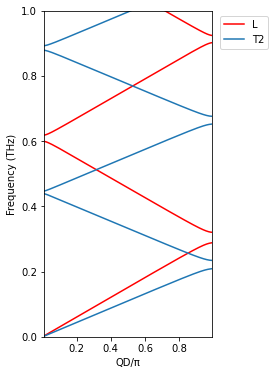

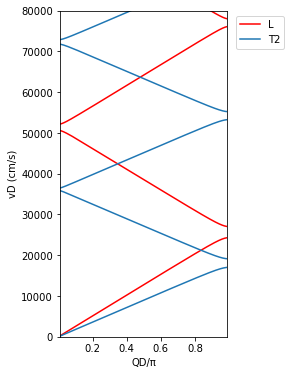

In [5]:
# Input values:
# material A = GaAs, B = AlAs

# Thickness
dA = 1 # nm, thickness of SiGe
dB = 1 # nm, thickness of Si
D = (dA + dB) # nm, Superlattice thickness

# Elastic constants:
# GaAs
GA_C11 = 118.8e10  # dyne/cm2, 1dyne/cm2 = 0.1 N/m2
GA_C12 = 53.8e10  # dyne/cm2,
GA_C44 = 59.4e10  # dyne/cm2,

# AlAs
AA_C11 = 120.2e10  # dyne/cm2, 1dyne/cm2 = 0.1 N/m2
AA_C12 = 57e10  # dyne/cm2,
AA_C44 = 58.9e10  # dyne/cm2,


# Density of the material:
rhoA = 5360 # kg/m3
rhoB = 3760 # kg/m3

# Velocity of sound: Look into Ref of Acoustic-phonon propagation in Superlattices
vAL = np.sqrt(GA_C11*0.1/rhoA) # m/s, longitudinal, C11
vBL = np.sqrt(AA_C11*0.1/rhoB) # m/s, longitudinal, C11

vAT1 = np.sqrt(GA_C12*0.1/rhoA) # m/s, Transverse, C12
vBT1 = np.sqrt(AA_C12*0.1/rhoB) # m/s, Transverse, C12

vAT2 = np.sqrt(GA_C44*0.1/rhoA) # m/s, Transverse, C44
vBT2 = np.sqrt(AA_C44*0.1/rhoB) # m/s, Transverse, C44


# Acoustic impedence
# Longitudinal
ZAL = rhoA*vAL     # Kg/m2s
ZBL = rhoB*vBL     # Kg/m2s

# Transverse
ZAT1 = rhoA*vAT1     # Kg/m2s
ZBT1 = rhoB*vBT1     # Kg/m2s

ZAT2 = rhoA*vAT2     # Kg/m2s
ZBT2 = rhoB*vBT2     # Kg/m2s

print("Acoustic impedences:")
print("Long ZA=", ZAL, "Kg/m^2s")
print("Long ZB=", ZBL, "Kg/m^2s")
print("T-1 ZA=", ZAT1, "Kg/m^2s")
print("T-1 ZB=", ZBT1, "Kg/m^2s")
print("T-2 ZA=", ZAT2, "Kg/m^2s")
print("T-2 ZB=", ZBT2, "Kg/m^2s")

# Ratio of impedence
del_A_BL = ZAL/ZBL # SiGe/Si

del_A_BT1 = ZAT1/ZBT1 # SiGe/Si
del_A_BT2 = ZAT2/ZBT2 # SiGe/Si
print("\nRatio of impedence:")
print("Long delta = ", del_A_BL)
print("T-1 delta = ", del_A_BT1)
print("T-2 delta = ", del_A_BT2)

# Acoustic modulation Chi
chiL = (ZAL - ZBL)/ np.sqrt(ZAL*ZBL)
chiT1 = (ZAT1 - ZBT1)/ np.sqrt(ZAT1*ZBT1)
chiT2 = (ZAT2 - ZBT2)/ np.sqrt(ZAT2*ZBT2)
print("\nAcoustic modulation:")
print("Long Chi = ", chiL)
print("T1 Chi = ", chiT1)
print("T2 Chi = ", chiT2)

# Gamma: 
GammaL = (1 - del_A_BL)**2/(2*del_A_BL)
GammaT1 = (1 - del_A_BT1)**2/(2*del_A_BT1)
GammaT2 = (1 - del_A_BT2)**2/(2*del_A_BT2)

print("\nGamma")
print("Long Gamma = ", Gamma)
print("T-1 Gamma = ", GammaT1)
print("T-2 Gamma = ", GammaT2)

# Left hand-side of the equation:
# Q = np.linspace(0, 0.28, 500)
# plt.plot(Q*D, np.cos(Q*D))
# plt.xlabel("QD")
# plt.ylabel("Cos(QD)")
# plt.show()

# Right hand-side of the equaiton:
# Frequency range
f = np.linspace(0, 10, 10000)  # 0-10 THz
w = 2*np.pi*f

def RHS(dA, dB, f, vA, vB, Gamma):
    return np.cos(w*(dA/vA * 1e3 + dB/vB * 1e3)) - Gamma*np.sin(w*dA/vA * 1e3)* np.sin(w*dB/vB * 1e3)

# Long
RHSL = RHS(dA, dB, f, vA, vB, GammaL)

# Transverse
RHST1 = RHS(dA, dB, f, vAT1, vBT1, GammaT1)
RHST2 = RHS(dA, dB, f, vAT2, vBT2, GammaT2)

# plt.plot(RHS, f, 'r')
# plt.xlabel("cos(qAdA + qBdB)-Gamma*sin(qAdA)sin(qBdB)")
# plt.ylabel("Frequency (THz)")
# plt.axvline(-1, color='k', ls='--')
# plt.axvline(+1, color='k', ls='--')
# plt.show()


# Phonon-dispersion:
inv_valL = np.arccos(np.clip(RHSL, -1, 1))
inv_valT1 = np.arccos(np.clip(RHST1, -1, 1))
inv_valT2 = np.arccos(np.clip(RHST2, -1, 1))

# Only Longitudinal:
fig = plt.figure(figsize=(3,6))
plt.plot(inv_valL/np.pi, f/(1.8*np.pi), 'r', label='L') 
# plt.plot(inv_valT1/np.pi, f/(1.3*np.pi), 'k', label='T1')
plt.plot(inv_valT2/np.pi, f/(1.3*np.pi), label='T2')
plt.xlabel("QD/\u03C0")
plt.ylabel("Frequency (THz)")
plt.xlim(0.01, 0.99)
plt.ylim(0, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig("./Dispersion_curves/GaAS_AlAS_disp_THZ.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Both L and T
fig = plt.figure(figsize=(3,6))
# plt.plot(inv_valL/np.pi, f/(1.42*np.pi), 'r')
# plt.plot(inv_valT1/np.pi, f/(1.3*np.pi), 'k')
# plt.plot(inv_valT2/np.pi, f/(1.3*np.pi))
plt.plot(inv_valL/np.pi, 1e4*D*f/(1.34), 'r', label='L')
# plt.plot(inv_valT1/np.pi, 1e4*D*f/(1.), 'k', label='T1')
plt.plot(inv_valT2/np.pi, 1e4*D*f/(1.), label='T2')
plt.xlabel("QD/\u03C0")
plt.ylabel("vD (cm/s)")
plt.xlim(0.01, 0.99)
# plt.axhline(20000)
plt.ylim(0, 0.8e5)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig("./Dispersion_curves/GaAS_AlAS_disp_vD.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# To reproduce the literature dispersion curve f had to be divided by 1.8*np.pi
# inv_val/np.pi is just normalization but I don't understand the division by 1.8*pi

In [6]:
# NOw lets change the variable for Al/Polymer

Acoustic impedences:
ZA= 17199000 Kg/m^2s
ZB= 6331500 Kg/m^2s

Ratio of impedence:
delta =  2.716417910447761

Acoustic modulation:
Chi =  1.0414171971787431

Gamma =  0.5422748892898146


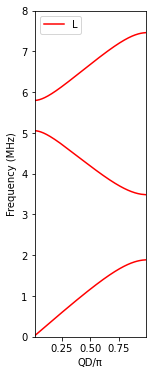

In [7]:
# Input values:
# material A = Al, B = Polymer
# Thickness
dA = 5e5 # nm, thickness of SiGe
dB = 5e5 # nm, thickness of Si
D = (dA + dB) # nm, Superlattice thickness

# Velocity of sound:
vA =6370 # m/s , Longitudinal
vB = 4690 # m/s, Longitudinal

# Density of the material:
rhoA = 2700 # kg/m3
rhoB = 1350 # kg/m3

# Acoustic impedence
ZA = rhoA*vA     # Kg/m2s
ZB = rhoB*vB     # Kg/m2s

print("Acoustic impedences:")
print("ZA=", ZA, "Kg/m^2s")
print("ZB=", ZB, "Kg/m^2s")

# Ratio of impedence
del_A_B = ZA/ZB # SiGe/Si
print("\nRatio of impedence:")
print("delta = ", del_A_B)

# Acoustic modulation Chi
chi = (ZA - ZB)/ np.sqrt(ZA*ZB)
print("\nAcoustic modulation:")
print("Chi = ", chi)

# Gamma: 
Gamma = (1 - del_A_B)**2/(2*del_A_B)
print("\nGamma = ", Gamma)

# Left hand-side of the equation:
# Q = np.linspace(0, 0.28, 500)
# plt.plot(Q*D, np.cos(Q*D))
# plt.xlabel("QD")
# plt.ylabel("Cos(QD)")
# plt.show()

# Right hand-side of the equaiton:
f = np.linspace(0, 1e-5, 2000)
RHS = np.cos(2*np.pi*f*(dA/vA * 1e3 + dB/vB * 1e3)) - Gamma* np.sin(2*np.pi*f*dA/vA * 1e3)* np.sin(2*np.pi*f*dB/vB * 1e3)
# plt.plot(RHS, f, 'r')
# plt.xlabel("cos(qAdA + qBdB)-Gamma*sin(qAdA)sin(qBdB)")
# plt.ylabel("Frequency (THz)")
# plt.axvline(-1, color='k', ls='--')
# plt.axvline(+1, color='k', ls='--')
# plt.show()


# Phonon-dispersion:
figure = plt.figure(figsize=(2,6))
inv_val = np.arccos(np.clip(RHS, -1, 1))
plt.plot(inv_val/np.pi, f*1e6, 'r', label='L')
plt.xlabel("QD/\u03C0")
plt.ylabel("Frequency (MHz)")
plt.xlim(0.01, 0.99)
plt.ylim(0, 8)
plt.legend()
plt.savefig("./Dispersion_curves/Al_polymer_disp_vD.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

In [8]:
# Now lets change the values for the Au and PE

Acoustic impedences:
ZA= 122920000 Kg/m^2s
ZB= 3084000 Kg/m^2s

Ratio of impedence:
delta =  39.85732814526589

Acoustic modulation:
Chi =  6.1548694246396884

Gamma =  18.941208817182243


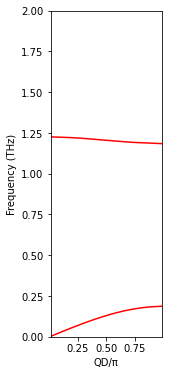

In [9]:
# Input values:
# material A = Au, B = PE
# Thickness
dA = 1.2 # nm, 
dB = 1 # nm, 
D = (dA + dB) # nm, Superlattice thickness

# Velocity of sound:
vA = 7000 # m/s, longitudinal, calc used
vB = 2400 # m/s, longitudinal, approximated using 

# Density of the material:
rhoA = 17560 # kg/m3, calc used, 19300 ideal
rhoB = 1285 # kg/m3, calc used 

# Acoustic impedence
ZA = rhoA*vA     # Kg/m2s
ZB = rhoB*vB     # Kg/m2s

print("Acoustic impedences:")
print("ZA=", ZA, "Kg/m^2s")
print("ZB=", ZB, "Kg/m^2s")

# Ratio of impedence
del_A_B = ZA/ZB # SiGe/Si
print("\nRatio of impedence:")
print("delta = ", del_A_B)

# Acoustic modulation Chi
chi = (ZA - ZB)/ np.sqrt(ZA*ZB)
print("\nAcoustic modulation:")
print("Chi = ", chi)

# Gamma: 
Gamma = (1 - del_A_B)**2/(2*del_A_B)
print("\nGamma = ", Gamma)

# Left hand-side of the equation:
Q = np.linspace(0, 0.28, 500)
# plt.plot(Q*D, np.cos(Q*D))
# plt.xlabel("QD")
# plt.ylabel("Cos(QD)")
# plt.show()

# Right hand-side of the equaiton:
f = np.linspace(0, 10, 5000)
RHS = np.cos(2*np.pi*f*(dA/vA * 1e3 + dB/vB * 1e3)) - Gamma* np.sin(2*np.pi*f*dA/vA * 1e3)* np.sin(2*np.pi*f*dB/vB * 1e3)
# plt.plot(RHS, f, 'r')
# plt.xlabel("cos(qAdA + qBdB)-Gamma*sin(qAdA)sin(qBdB)")
# plt.ylabel("Frequency (THz)")
# plt.axvline(-1, color='k', ls='--')
# plt.axvline(+1, color='k', ls='--')
# plt.show()


# Phonon-dispersion:
inv_val = np.arccos(np.clip(RHS, -1, 1))
fig = plt.figure(figsize=(2,6))
plt.plot(inv_val/np.pi, f, 'r') 
plt.xlabel("QD/\u03C0")
plt.ylabel("Frequency (THz)")
plt.xlim(0.01, 0.99)
plt.ylim(0, 2)
plt.show()

# To reproduce the literature dispersion curve f had to be divided by 1.35*np.pi
# inv_val/np.pi is just normalization but I don't understand the division by 1.35*pi

In [10]:
# Changing the value of density, 

Acoustic impedences:
Long ZA= 80297780.04403359 Kg/m^2s
Long ZB= 8331855.675658334 Kg/m^2s
T-1 ZA= 76394493.7806384 Kg/m^2s
T-1 ZB= 4067891.468562061 Kg/m^2s
T-2 ZA= 76394493.7806384 Kg/m^2s
T-2 ZB= 4067891.468562061 Kg/m^2s

Ratio of impedence:
Long delta =  9.637442506190427
T-1 delta =  18.779875119835168
T-2 delta =  18.779875119835168

Acoustic modulation:
Long Chi =  2.7823020098641367
T1 Chi =  4.1028189833617414
T2 Chi =  4.1028189833617414

Gamma
Long Gamma =  18.941208817182243
T-1 Gamma =  8.41656180511674
T-2 Gamma =  8.41656180511674


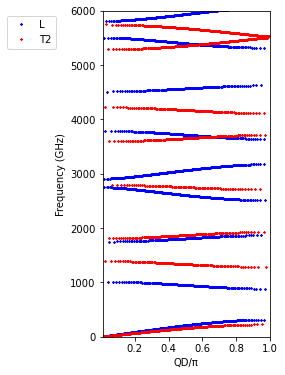

In [34]:
# Input values:
# material A = GaAs, B = AlAs

# Thickness
dA = 1.181 # nm, thickness of SiGe
dB = 1.311 # nm, thickness of Si
D = (dA + dB) # nm, Superlattice thickness

# Elastic constants:
# Au FCC
# GA_C11 = 227.862e10  # dyne/cm2, 1dyne/cm2 = 0.1 N/m2
# GA_C12 = 145.6144e10  # dyne/cm2,
# GA_C44 = 145.6144e10  # dyne/cm2,

# Au 111
GA_C11 = 367.183e10  # dyne/cm2, 1dyne/cm2 = 0.1 N/m2
GA_C12 = 332.353e10  # dyne/cm2,
GA_C44 = 332.353e10  # dyne/cm2,

# Polyethylene
AA_C11 = 61.597e10  # dyne/cm2, 1dyne/cm2 = 0.1 N/m2, 61.597e10
AA_C12 = 14.683e10  # dyne/cm2,
AA_C44 = 14.683e10  # dyne/cm2,


# Density of the material:
rhoA = 17560 # kg/m3, calc used, 19300 ideal
rhoB = 1127 # kg/m3, calc used 

# Velocity of sound: Look into Ref of Acoustic-phonon propagation in Superlattices
vAL = np.sqrt(GA_C11*0.1/rhoA) # m/s, longitudinal, C11
vBL = np.sqrt(AA_C11*0.1/rhoB) # m/s, longitudinal, C11

vAT1 = np.sqrt(GA_C12*0.1/rhoA) # m/s, Transverse, C12
vBT1 = np.sqrt(AA_C12*0.1/rhoB) # m/s, Transverse, C12

vAT2 = np.sqrt(GA_C44*0.1/rhoA) # m/s, Transverse, C44
vBT2 = np.sqrt(AA_C44*0.1/rhoB) # m/s, Transverse, C44


# Acoustic impedence
# Longitudinal
ZAL = rhoA*vAL     # Kg/m2s
ZBL = rhoB*vBL     # Kg/m2s

# Transverse
ZAT1 = rhoA*vAT1     # Kg/m2s
ZBT1 = rhoB*vBT1     # Kg/m2s

ZAT2 = rhoA*vAT2     # Kg/m2s
ZBT2 = rhoB*vBT2     # Kg/m2s

print("Acoustic impedences:")
print("Long ZA=", ZAL, "Kg/m^2s")
print("Long ZB=", ZBL, "Kg/m^2s")
print("T-1 ZA=", ZAT1, "Kg/m^2s")
print("T-1 ZB=", ZBT1, "Kg/m^2s")
print("T-2 ZA=", ZAT2, "Kg/m^2s")
print("T-2 ZB=", ZBT2, "Kg/m^2s")

# Ratio of impedence
del_A_BL = ZAL/ZBL # SiGe/Si

del_A_BT1 = ZAT1/ZBT1 # SiGe/Si
del_A_BT2 = ZAT2/ZBT2 # SiGe/Si
print("\nRatio of impedence:")
print("Long delta = ", del_A_BL)
print("T-1 delta = ", del_A_BT1)
print("T-2 delta = ", del_A_BT2)

# Acoustic modulation Chi
chiL = (ZAL - ZBL)/ np.sqrt(ZAL*ZBL)
chiT1 = (ZAT1 - ZBT1)/ np.sqrt(ZAT1*ZBT1)
chiT2 = (ZAT2 - ZBT2)/ np.sqrt(ZAT2*ZBT2)
print("\nAcoustic modulation:")
print("Long Chi = ", chiL)
print("T1 Chi = ", chiT1)
print("T2 Chi = ", chiT2)

# Gamma: 
GammaL = (1 - del_A_BL)**2/(2*del_A_BL)
GammaT1 = (1 - del_A_BT1)**2/(2*del_A_BT1)
GammaT2 = (1 - del_A_BT2)**2/(2*del_A_BT2)

print("\nGamma")
print("Long Gamma = ", Gamma)
print("T-1 Gamma = ", GammaT1)
print("T-2 Gamma = ", GammaT2)

# Left hand-side of the equation:
# Q = np.linspace(0, 0.28, 500)
# plt.plot(Q*D, np.cos(Q*D))
# plt.xlabel("QD")
# plt.ylabel("Cos(QD)")
# plt.show()

# Right hand-side of the equaiton:
# Frequency range
f = np.linspace(0, 10, 10000)  # 0-10 THz
w = 2*np.pi*f

def RHS(dA, dB, f, vA, vB, Gamma):
    return np.cos(w*(dA/vA * 1e3 + dB/vB * 1e3)) - Gamma*np.sin(w*dA/vA * 1e3)* np.sin(w*dB/vB * 1e3)

# Long
RHSL = RHS(dA, dB, f, vA, vB, GammaL)

# Transverse
RHST1 = RHS(dA, dB, f, vAT1, vBT1, GammaT1)
RHST2 = RHS(dA, dB, f, vAT2, vBT2, GammaT2)

# plt.plot(RHS, f, 'r')
# plt.xlabel("cos(qAdA + qBdB)-Gamma*sin(qAdA)sin(qBdB)")
# plt.ylabel("Frequency (THz)")
# plt.axvline(-1, color='k', ls='--')
# plt.axvline(+1, color='k', ls='--')
# plt.show()


# Phonon-dispersion:
inv_valL = np.arccos(np.clip(RHSL, -1, 1))/np.pi
inv_valT1 = np.arccos(np.clip(RHST1, -1, 1))/np.pi
inv_valT2 = np.arccos(np.clip(RHST2, -1, 1))/np.pi

# Taking care of bandgap
inv_valL = np.where((inv_valL == 0) | (inv_valL == 1), -0.0001, inv_valL)
inv_valT1 = np.where((inv_valT1 == 0) | (inv_valT1 == 1), -0.0001, inv_valT1)
inv_valT2 = np.where((inv_valT2 == 0) | (inv_valT2 == 1), --0.0001, inv_valT2)

# Only Longitudinal:
fig = plt.figure(figsize=(3,6))
plt.plot(inv_valL, f*1000, '*b', markersize=2, label='L') 
# plt.plot(inv_valT1, f, 'k', label='T1')
plt.plot(inv_valT2, f*1000, '*r', markersize=2, label='T2')
plt.xlabel("QD/\u03C0")
plt.ylabel("Frequency (GHz)")
plt.xlim(0.01, 1)
plt.ylim(0, 6000)
plt.legend(loc='upper left', bbox_to_anchor=(-0.6, 1))
plt.savefig("./Dispersion_curves/Au_Polymer_disp_THZ.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# # DOS
# fig = plt.figure(figsize=(3,6))
# plt.plot(inv_valL, f*1000, 'b', label='DOS L')
# plt.plot(inv_valT2, f*1000, 'r', label='DOS T')
# plt.xlim(0, 1.2)
# plt.ylim(0, 3000)
# plt.xlabel("DOS [a.u]")
# plt.ylabel("Frequency (GHz)")
# plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
# plt.show()

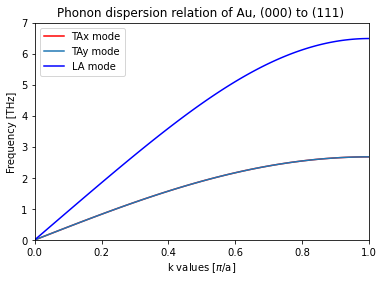

k-value: 0.4 
LA freq: 3.6006987181474495 THz 
TA freq: 1.5748375726348565 THz


In [26]:
# Reading the phonon dispersion data:
filename = '../Au_1800_C3500/Au_morse.disp'
with open(filename, 'r') as file:
    lines = file.readlines()

data = [line.split() for line in lines if not line.startswith('#')]

data = np.array(data)
data = data.astype(np.float64)
cm_2_THz = 29979245800/1e12
TAx = data[0::3][:, 1]*cm_2_THz  # in (cm-1)
TAy = data[1::3][:, 1]*cm_2_THz  # in (cm-1)
LA = data[2::3][:, 1]*cm_2_THz   # in (cm-1)
k_val = (data[0::3][:, 0] - 1)/100

plt.plot(k_val, TAx, '-r', label='TAx mode')
plt.plot(k_val, TAy, '-', label='TAy mode')
plt.plot(k_val, LA, '-b', label='LA mode')
plt.xlabel('k values [$\pi$/a]')
plt.ylabel('Frequency [THz]')
plt.title('Phonon dispersion relation of Au, (000) to (111) ')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.savefig("./Dispersion_curves/Au_only.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

val=40
print("k-value:", k_val[val], "\nLA freq:", LA[val],"THz", 
      "\nTA freq:", TAx[val], "THz");

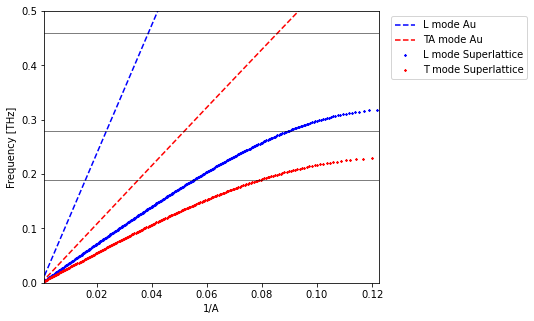

In [35]:
fig = plt.figure(figsize=(6,5))
plt.plot(k_val*np.pi/4.0179, LA, '--b', label='L mode Au')
plt.plot(k_val*np.pi/4.0179, TAx, '--r', label='TA mode Au')
# plt.plot(k_val*np.pi/4.0179, TAy, '-', label='TAy mode')
# plt.plot(k_val*np.pi/4.0179, LA/3.55, label='L mode Au modified')
plt.plot(np.pi*inv_valL/(D*10), f, '*b', markersize=2, label='L mode Superlattice')
plt.plot(np.pi*inv_valT2/(D*10), f, '*r', markersize=2, label='T mode Superlattice')
plt.axhline(0.75, color='k', ls='-', linewidth=185, alpha=0.2)
plt.xlim(0.001, 1.225/10)
plt.ylim(0, .5)
# plt.axhline(.32, color='k', ls='-', linewidth=.5)
# plt.axhline(1.175, color='k', ls='-', linewidth=.5)
# plt.axvline(.0205, color='k', ls='-', linewidth=.5)
# plt.axhline(.08, color='k', ls='-', linewidth=.5)
plt.axhline(.19, color='k', ls='-', linewidth=.5)
plt.axhline(.28, color='k', ls='-', linewidth=.5)
plt.axhline(.46, color='k', ls='-', linewidth=.5)
# plt.axvline(.083, color='k', ls='-', linewidth=.5)
plt.xlabel('1/A')
plt.ylabel('Frequency [THz]')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig("./Dispersion_curves/Au_only_Au_MNL.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

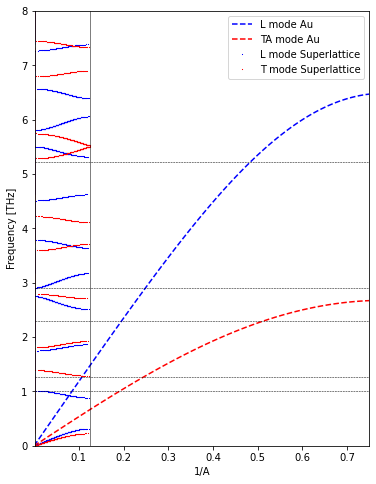

In [33]:
fig = plt.figure(figsize=(6,8))
plt.plot(k_val*np.pi/4.0179, LA, '--b', label='L mode Au')
plt.plot(k_val*np.pi/4.0179, TAx, '--r', label='TA mode Au')
# plt.plot(k_val*np.pi/4.0179, TAy, '-', label='TAy mode')
# plt.plot(k_val*np.pi/4.0179, LA/3.55, label='L mode Au modified')
plt.plot(np.pi*inv_valL/(D*10), f, '*b', markersize=0.5, label='L mode Superlattice')
plt.plot(np.pi*inv_valT2/(D*10), f, '*r', markersize=0.5, label='T mode Superlattice')
plt.xlim(0.001, 7.5/10)
plt.ylim(0, 8)
plt.axvline(0.125, color='k', ls='-', linewidth=.5)

plt.axhline(1, color='k', ls='--', linewidth=.5)
plt.axhline(1.26, color='k', ls='--', linewidth=.5)
plt.axhline(2.3, color='k', ls='--', linewidth=.5)
plt.axhline(2.91, color='k', ls='--', linewidth=.5)
plt.axhline(5.22, color='k', ls='--', linewidth=.5)

# plt.axhline(0.75, color='k', ls='-', linewidth=185, alpha=0.2)
# plt.axhline(.32, color='k', ls='-', linewidth=.5)
# plt.axhline(1.175, color='k', ls='-', linewidth=.5)
# plt.axvline(.0205, color='k', ls='-', linewidth=.5)
# plt.axhline(.08, color='k', ls='-', linewidth=.5)
# plt.axhline(.28, color='k', ls='-', linewidth=.5)
# plt.axvline(.083, color='k', ls='-', linewidth=.5)
plt.xlabel('1/A')
plt.ylabel('Frequency [THz]')
plt.legend()
plt.savefig("./Dispersion_curves/Au_only_Au_MNL_all.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

In [24]:
np.savetxt("./Dispersion_curves/Au_MNL_disp.dat", np.hstack((inv_valL[:, None]/(D*10), inv_valT2[:, None]/(D*10), f[:, None])))